### Importing libraries & functions

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.others_tb import give_json, filter_countries

### Collecting the data

In [137]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)

### Cleaning the data

In [138]:
# Change the date column to datetime format
df['date'] = pd.to_datetime(df['date'])
# Dropping columns that are entirely composed of NANs
df = df.dropna(axis=1, how='all')

### Group C constraints

In [139]:
countries = ['Spain', 'Iran', 'Mexico', 'Brazil', 'Netherlands']
col = 'total_cases'
glob_countries = ['International', 'World']

### Filtering the Dataframe to group C's countries

In [140]:
# All 5 countries
df_c = filter_countries(df, countries)
# Spain
df_esp = filter_countries(df, ['Spain'])
# Iran
df_irn = filter_countries(df, ['Iran'])
# Netherlands
df_nth = filter_countries(df, ['Netherlands'])
# Mexico
df_mex = filter_countries(df, ['Mexico'])
# Brazil
df_bra = filter_countries(df, ['Brazil'])


### Obtaining json file from group C constraints

In [141]:
the_json = give_json(df=df, countries=countries, column_of_interest=col)

## Some visualization

Text(0.5, 1.0, 'Average total cases per day of the 5 countries')

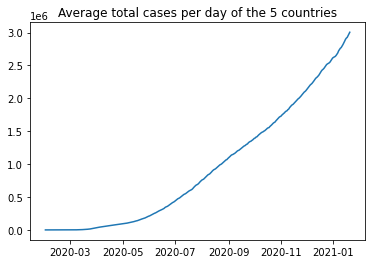

In [142]:
# Plot our json
plt.plot(pd.read_json(the_json))
plt.title('Average total cases per day of the 5 countries')

<AxesSubplot:>

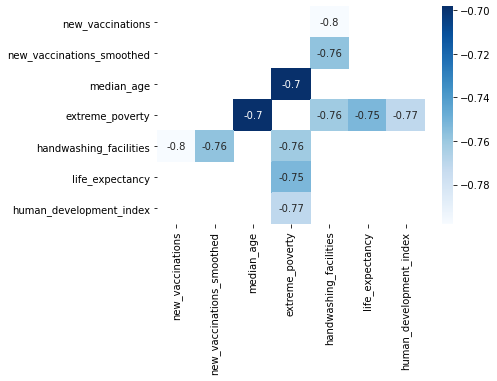

In [143]:
# Negative correlations of all the countries
p = df.corr()[df.corr() < -0.6]
p = p.dropna(axis=0, how='all')
p = p.dropna(axis=1, how='all')
sns.heatmap(p, cmap='Blues', annot=True)

<AxesSubplot:>

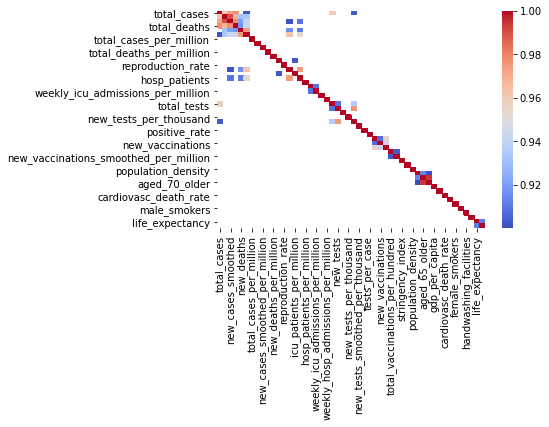

In [144]:
# Positive correlations of all the countries
p = df.corr()[df.corr() > 0.9]
p = p.dropna(axis=0, how='all')
p = p.dropna(axis=1, how='all')
sns.heatmap(p, cmap='coolwarm', annot=False)

<AxesSubplot:>

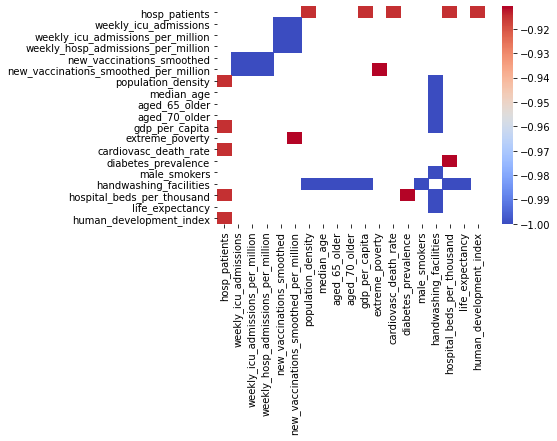

In [145]:
# Negative correlations of the 5 countries
p_c = df_c.corr()[df_c.corr() < -0.9]
p_c = p_c.dropna(axis=0, how='all')
p_c = p_c.dropna(axis=1, how='all')
sns.heatmap(p_c, cmap='coolwarm', annot=False)

<AxesSubplot:>

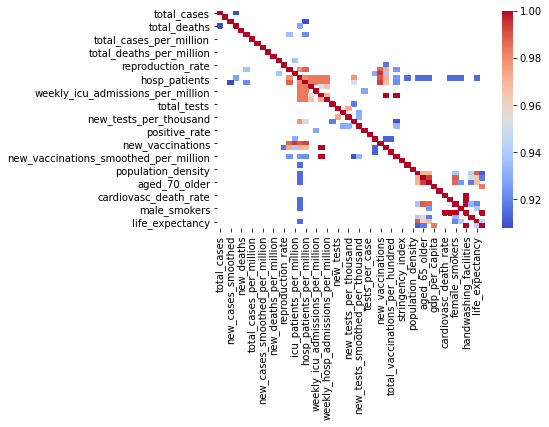

In [146]:
# Positive correlations of the 5 countries
p_c = df_c.corr()[df_c.corr() > 0.9].drop(index=['new_cases_smoothed', 'new_deaths_smoothed'])
p_c = p_c.dropna(axis=0, how='all')
p_c = p_c.dropna(axis=1, how='all')
sns.heatmap(p_c, cmap='coolwarm', annot=False)

In [186]:
corr = df.corr() # df is the pandas dataframe
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

human_development_index          human_development_index               1.0
new_tests_per_thousand           new_tests_per_thousand                1.0
new_tests_smoothed_per_thousand  new_tests_smoothed_per_thousand       1.0
positive_rate                    positive_rate                         1.0
tests_per_case                   tests_per_case                        1.0
                                                                      ... 
handwashing_facilities           hosp_patients_per_million             NaN
                                 weekly_icu_admissions                 NaN
                                 weekly_icu_admissions_per_million     NaN
                                 weekly_hosp_admissions                NaN
                                 weekly_hosp_admissions_per_million    NaN
Length: 2500, dtype: float64

Text(0.5, 1.0, 'Spain Correlations')

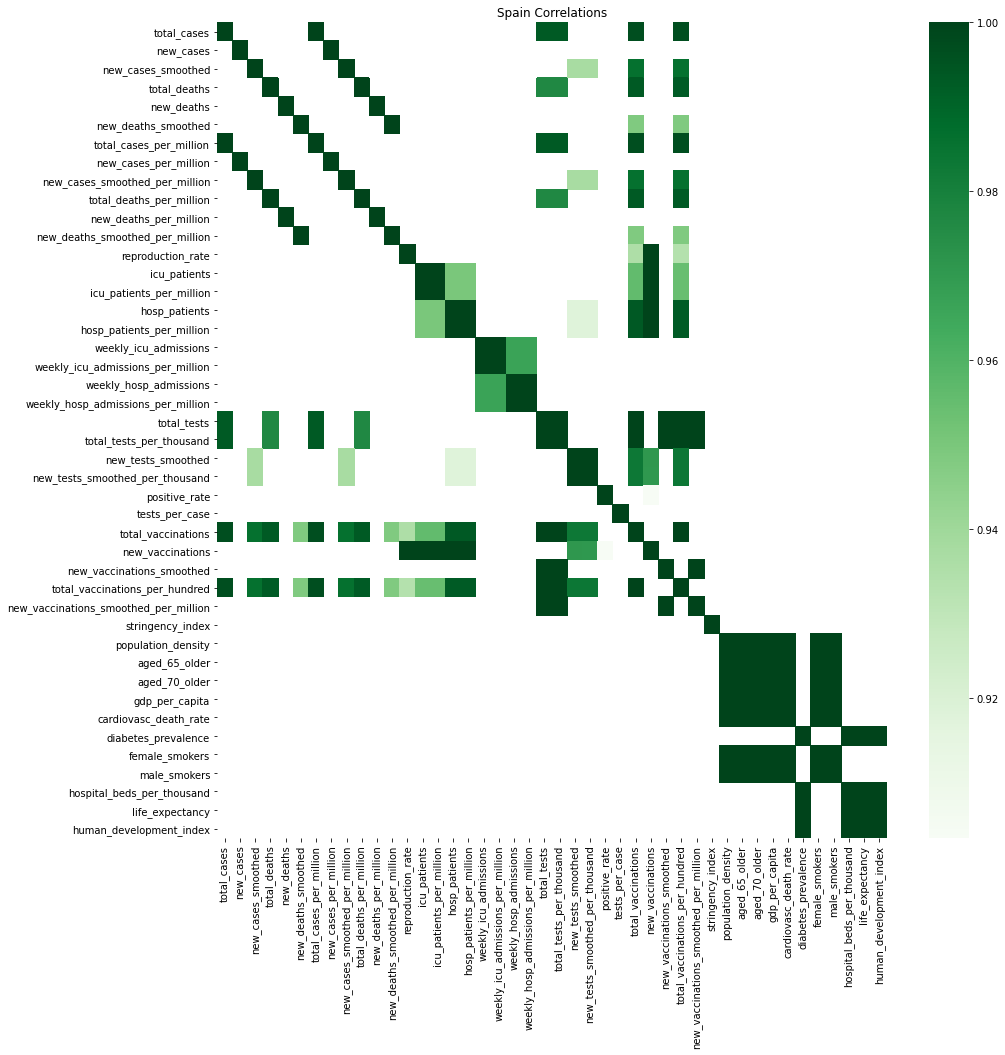

In [181]:
# Positive correlations of Spain
cols_to_drop = ['new_cases_smoothed', 'new_deaths_smoothed', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'new_tests_smoothed_per_thousand', 'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million']

p_esp = df_esp.corr()[df_esp.corr() > 0.9]
p_esp = p_esp.dropna(axis=0, how='all')
p_esp = p_esp.dropna(axis=1, how='all')
plt.figure(figsize=(15, 15))
sns.heatmap(p_esp, cmap='Greens', annot=False)
plt.title('Spain Correlations')

In [171]:
df_esp.corr()[df_esp.corr() > 0.9].loc[:, :'total_deaths_per_million']

NaN           NaN   
weekly_icu_admissions                                 NaN           NaN   
weekly_icu_admissions_per_million                     NaN           NaN   
weekly_hosp_admissions                                NaN           NaN   
weekly_hosp_admissions_per_million                    NaN           NaN   
total_tests                                           NaN      0.976699   
new_tests                                             NaN           NaN   
total_tests_per_thousand                              NaN      0.976699   
new_tests_per_thousand                                NaN           NaN   
new_tests_smoothed                               0.937658           NaN   
new_tests_smoothed_per_thousand                  0.937633           NaN   
positive_rate                                         NaN           NaN   
tests_per_case                                        NaN           NaN   
total_vaccinations                               0.986313      0.993285   
new_vaccinations                                      NaN           NaN   
new_vaccinations_smoothed                             NaN           NaN   
total_vaccinations_per_hundred                   0.986206      0.993075   
new_vaccinations_smoothed_per_million                 NaN           NaN   
stringency_index                                      NaN           NaN   
population                                            NaN           NaN   
population_density                                    NaN           NaN   
median_age                                            NaN           NaN   
aged_65_older                                         NaN           NaN   
aged_70_older                                         NaN           NaN   
gdp_per_capita                                        NaN           NaN   
extreme_poverty                                       NaN           NaN   
cardiovasc_death_rate                                 NaN           NaN   
diabetes_prevalence                                   NaN           NaN   
female_smokers                                        NaN           NaN   
male_smokers                                          NaN           NaN   
handwashing_facilities                                NaN           NaN   
hospital_beds_per_thousand                            NaN           NaN   
life_expectancy                                       NaN           NaN   
human_development_index                               NaN           NaN   

                                       new_deaths  new_deaths_smoothed  \
total_cases                                   NaN                  NaN   
new_cases                                     NaN                  NaN   
new_cases_smoothed                            NaN                  NaN   
total_deaths                                  NaN                  NaN   
new_deaths                                    1.0                  NaN   
new_deaths_smoothed                           NaN             1.000000   
total_cases_per_million                       NaN                  NaN   
new_cases_per_million                         NaN                  NaN   
new_cases_smoothed_per_million                NaN                  NaN   
total_deaths_per_million                      NaN                  NaN   
new_deaths_per_million                        1.0                  NaN   
new_deaths_smoothed_per_million               NaN             1.000000   
reproduction_rate                             NaN                  NaN   
icu_patients                                  NaN                  NaN   
icu_patients_per_million                      NaN                  NaN   
hosp_patients                                 NaN                  NaN   
hosp_patients_per_million                     NaN                  NaN   
weekly_icu_admissions                         NaN                  NaN   
weekly_icu_admissions_per_million             NaN                  NaN   
weekly_hosp_admissions 

In [179]:
df_c.corr()[df_c.corr() > 0.9].drop(index=cols_to_drop, columns=cols_to_drop).iloc[:, :20]

NaN                        NaN   
hosp_patients                            1.000000                   0.980863   
hosp_patients_per_million                0.980863                   1.000000   
weekly_icu_admissions                    0.983781                   0.983781   
weekly_icu_admissions_per_million        0.983783                   0.983783   
weekly_hosp_admissions                   0.984052                   0.984052   
weekly_hosp_admissions_per_million       0.984052                   0.984052   
total_tests                                   NaN                        NaN   
new_tests                                     NaN                        NaN   
total_tests_per_thousand                      NaN                        NaN   
new_tests_per_thousand                        NaN                        NaN   
new_tests_smoothed                       0.977758                   0.952551   
positive_rate                                 NaN                        NaN   
tests_per_case                                NaN                        NaN   
total_vaccinations                            NaN                        NaN   
new_vaccinations                         0.989869                   0.992935   
total_vaccinations_per_hundred                NaN                        NaN   
stringency_index                              NaN                        NaN   
population                               0.914718                        NaN   
population_density                            NaN                        NaN   
median_age                               0.914718                        NaN   
aged_65_older                            0.914718                        NaN   
aged_70_older                            0.914718                        NaN   
gdp_per_capita                                NaN                        NaN   
extreme_poverty                               NaN                        NaN   
cardiovasc_death_rate                         NaN                        NaN   
diabetes_prevalence                      0.914718                        NaN   
female_smokers                           0.914718                        NaN   
male_smokers                             0.914718                        NaN   
handwashing_facilities                        NaN                        NaN   
hospital_beds_per_thousand                    NaN                        NaN   
life_expectancy                          0.914718                        NaN   
human_development_index                       NaN                        NaN   

                                    weekly_icu_admissions  \
total_cases                                           NaN   
new_cases                                             NaN   
total_deaths                                          NaN   
new_deaths                                            NaN   
total_cases_per_million                               NaN   
new_cases_per_million                                 NaN   
total_deaths_per_million                              NaN   
new_deaths_per_million                                NaN   
reproduction_rate                                     NaN   
icu_patients                                          NaN   
icu_patients_per_million                              NaN   
hosp_patients                                    0.983781   
hosp_patients_per_million                        0.983781   
weekly_icu_admissions                            1.000000   
weekly_icu_admissions_per_million                     NaN   
weekly_hosp_admissions                           0.952564   
weekly_hosp_admissions_per_million               0.966509   
total_tests                                           NaN   
new_tests                                             NaN   
total_tests_per_thousand                              NaN   
new_tests_per_thousand                                NaN   
new_tests_smoothed                                    NaN   
po

Text(0.5, 1.0, 'Spain Correlations')

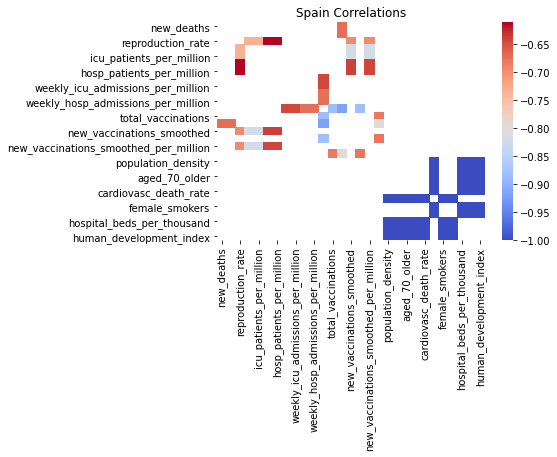

In [149]:
# Negative correlations of Spain
p_esp = df_esp.corr()[df_esp.corr() < -0.6]
p_esp = p_esp.dropna(axis=0, how='all')
p_esp = p_esp.dropna(axis=1, how='all')
sns.heatmap(p_esp, cmap='coolwarm', annot=False)
plt.title('Spain Correlations')

Text(0.5, 1.0, 'Netherlands Correlations')

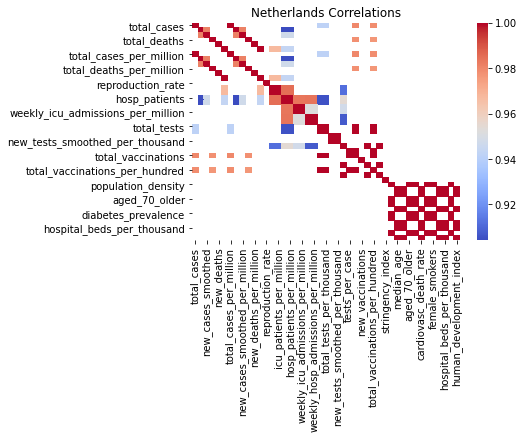

In [150]:
# Positive correlations of Netherlands
p_nth = df_nth.corr()[df_nth.corr() > 0.9]
p_nth = p_nth.dropna(axis=0, how='all')
p_nth = p_nth.dropna(axis=1, how='all')
sns.heatmap(p_nth, cmap='coolwarm', annot=False)
plt.title('Netherlands Correlations')

Text(0.5, 1.0, 'Netherlands Correlations')

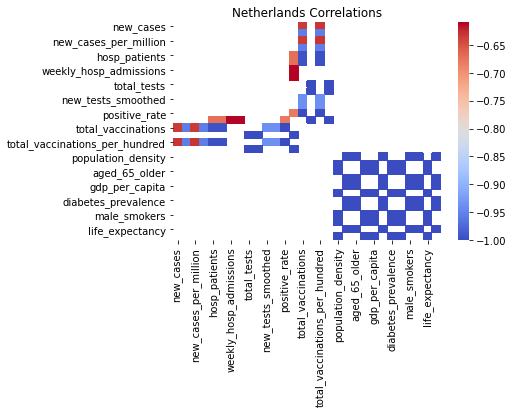

In [151]:
# Negative correlations of Netherlands
p_nth = df_nth.corr()[df_nth.corr() < -0.6]
p_nth = p_nth.dropna(axis=0, how='all')
p_nth = p_nth.dropna(axis=1, how='all')
sns.heatmap(p_nth, cmap='coolwarm', annot=False)
plt.title('Netherlands Correlations')

Text(0.5, 1.0, 'Mexico Correlations')

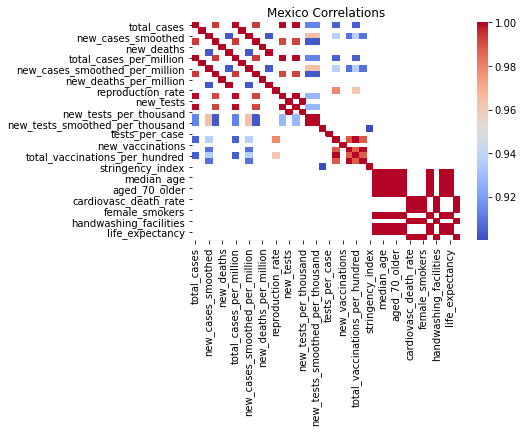

In [152]:
# Positive correlations of Mexico
p_mex = df_mex.corr()[df_mex.corr() > 0.9]
p_mex = p_mex.dropna(axis=0, how='all')
p_mex = p_mex.dropna(axis=1, how='all')
sns.heatmap(p_mex, cmap='coolwarm', annot=False)
plt.title('Mexico Correlations')

Text(0.5, 1.0, 'Mexico Correlations')

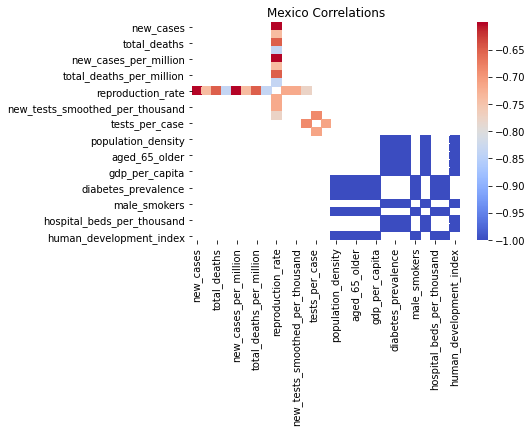

In [153]:
# Negativo correlations of Mexico
p_mex = df_mex.corr()[df_mex.corr() < -0.6]
p_mex = p_mex.dropna(axis=0, how='all')
p_mex = p_mex.dropna(axis=1, how='all')
sns.heatmap(p_mex, cmap='coolwarm', annot=False)
plt.title('Mexico Correlations')

Text(0.5, 1.0, 'Brazil Correlations')

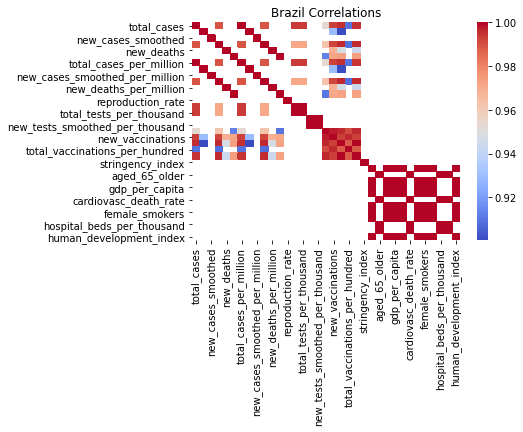

In [154]:
# Positive correlations of Brazil
p_bra = df_bra.corr()[df_bra.corr() > 0.9]
p_bra = p_bra.dropna(axis=0, how='all')
p_bra = p_bra.dropna(axis=1, how='all')
sns.heatmap(p_bra, cmap='coolwarm', annot=False)
plt.title('Brazil Correlations')

Text(0.5, 1.0, 'Brazil Correlations')

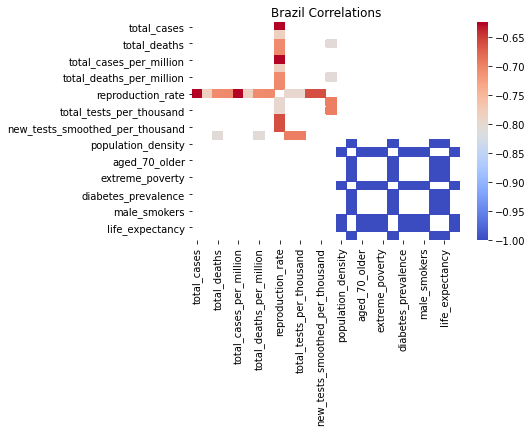

In [155]:
# Negative correlations of Brazil
p_bra = df_bra.corr()[df_bra.corr() < -0.6]
p_bra = p_bra.dropna(axis=0, how='all')
p_bra = p_bra.dropna(axis=1, how='all')
sns.heatmap(p_bra, cmap='coolwarm', annot=False)
plt.title('Brazil Correlations')

Text(0.5, 1.0, 'Iran Correlations')

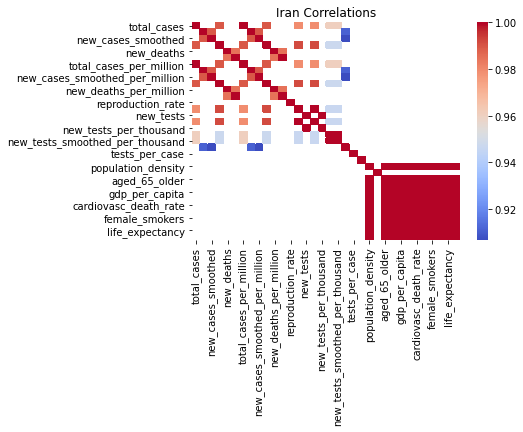

In [156]:
# Positive correlations of Iran
p_irn = df_irn.corr()[df_irn.corr() > 0.9]
p_irn = p_irn.dropna(axis=0, how='all')
p_irn = p_irn.dropna(axis=1, how='all')
sns.heatmap(p_irn, cmap='coolwarm', annot=False)
plt.title('Iran Correlations')

Text(0.5, 1.0, 'Iran Correlations')

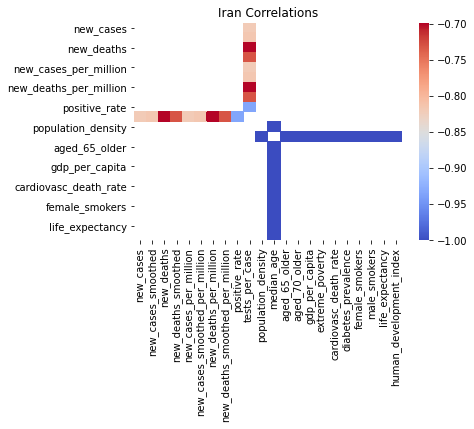

In [157]:
# Negative correlations of Iran
p_irn = df_irn.corr()[df_irn.corr() < -0.6]
p_irn = p_irn.dropna(axis=0, how='all')
p_irn = p_irn.dropna(axis=1, how='all')
sns.heatmap(p_irn, cmap='coolwarm', annot=False)
plt.title('Iran Correlations')

## Ranking of the 5 countries

In [158]:
# Total infected, total deaths, life expectancy

In [159]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred',
       'new_vaccinations_smoothed_per_mil

In [160]:
# Finding the most recent day
rec_date = df['date'].iloc[-1]

In [161]:
# Ranking of the countries according to total cases
ranked_cases = df[df['date'] == rec_date].sort_values('total_cases', ascending=False, ignore_index = True).drop(0)[['location', 'total_cases']].fillna(0)
ranked_cases.index.name = 'Rank'
a = ranked_cases[ranked_cases['location'].isin(countries)]
a

location  total_cases
Rank                          
3          Brazil    8638249.0
8           Spain    2412318.0
13         Mexico    1688944.0
16           Iran    1348316.0
19    Netherlands     940106.0

Text(0.5, 1.0, 'Total Cases')

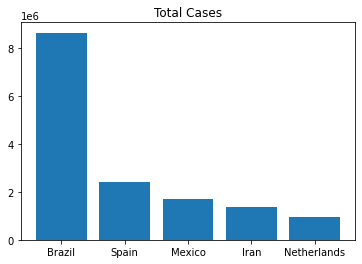

In [162]:
plt.bar(range(len(a)), a['total_cases'])
plt.xticks(range(len(a)), a['location'])
plt.title('Total Cases')

In [163]:
# Ranking of the countries according to total deaths
ranked_deaths = df[df['date'] == rec_date].sort_values('total_deaths', ascending=False, ignore_index = True).drop(0)[['location', 'total_deaths']].fillna(0)
ranked_deaths.index.name = 'Rank'
a = ranked_deaths[ranked_deaths['location'].isin(countries)]
a

location  total_deaths
Rank                           
2          Brazil      212831.0
4          Mexico      144371.0
9            Iran       57057.0
10          Spain       54637.0
26    Netherlands       13350.0

Text(0.5, 1.0, 'Total deaths')

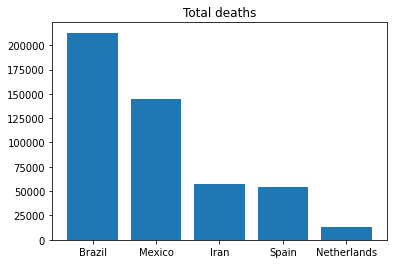

In [164]:
plt.bar(range(len(a)), a['total_deaths'])
plt.xticks(range(len(a)), a['location'])
plt.title('Total deaths')

In [170]:
# Ranking of the countries according to life expectancy
ranked_le = df[df['date'] == rec_date].sort_values('life_expectancy', ascending=False, ignore_index = True)[['location', 'life_expectancy']].fillna(0)
ranked_le.index.name = 'Rank'
a = ranked_le[ranked_le['location'].isin(countries)]
a

location  life_expectancy
Rank                              
6           Spain            83.56
20    Netherlands            82.28
66           Iran            76.68
74         Brazil            75.88
85         Mexico            75.05

Text(0.5, 1.0, 'Life Expectancy')

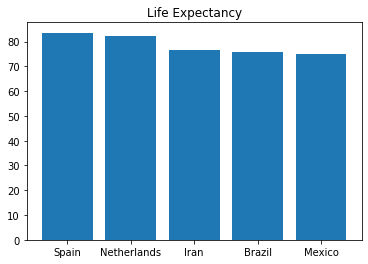

In [166]:
plt.bar(range(len(a)), a['life_expectancy'])
plt.xticks(range(len(a)), a['location'])
plt.title('Life Expectancy')

In [169]:
df[df['date'] == rec_date].sort_values('life_expectancy', ascending=False, ignore_index = True)[['location', 'life_expectancy']]

location  life_expectancy
0                      Monaco            86.75
1                  San Marino            84.97
2                       Japan            84.63
3                 Switzerland            83.78
4                     Andorra            83.73
..                        ...              ...
186                   Lesotho            54.33
187                      Chad            54.24
188  Central African Republic            53.28
189             International              NaN
190                    Kosovo              NaN

[191 rows x 2 columns]